In [82]:
# All imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# Read the data
data = pd.read_csv('sample_data/data.csv')

In [84]:
data.head()

,ID,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore
0,1,3103.0,317.0,374.0,250.0,268468.0,32216.16,236251.84,1127.90,778
1,2,2939.0,368.0,395.0,228.0,335467.0,30192.03,305274.97,2240.00,546
2,3,4676.0,222.0,352.0,368.0,461177.0,36894.16,424282.84,2277.64,736
3,4,8469.0,224.0,416.0,400.0,326904.0,22883.28,304020.72,1451.44,761
4,5,2406.0,497.0,385.0,444.0,472661.0,23633.05,449027.95,2987.39,615


In [85]:
#Add columns to save the results
data["Approval"] = ""
data["Reason"] = ""

In [86]:
for x in data.index:
  approved = False
  if data['CreditScore'][x] > 640: # Check for Credit Score condition 
    
    loanbalance = data['AppraisedValue'][x]-data['DownPayment'][x]
    ltv = (loanbalance/data['AppraisedValue'][x])*100
    if ltv > 80:                   # Check for Loan to Value Condition
      pmi = data['AppraisedValue'][x]/100     # Account for PMI
    else:
      pmi = 0
    temp = pmi + data['CreditCardPayment'][x]+data['CarPayment'][x]+data['StudentLoanPayments'][x]+data['MonthlyMortgagePayment'][x]
    dti = (temp / data['GrossMonthlyIncome'][x])*100  # Calculate DTI
    if dti <= 43:                  # Check for DTI condition
      fedti = ((temp-data['MonthlyMortgagePayment'][x]-pmi)/data['GrossMonthlyIncome'][x])*100  # Calculate FEDTI
      if fedti <= 28 and ltv <= 95:
        approved = True
        data['Approval'][x] = "Yes"
        data['Reason'][x] = "You pass all criteria"  # Enter all feedback
      else:
        data['Reason'][x] = "FEDTI is high, should be 28% or less"
        data['Approval'][x] = "No"
    else:
      data['Reason'][x] = "DTI is high, should be 43 or less prefereably less than 28%"
      data['Approval'][x] = "No"
  else:
    data['Reason'][x] = "Credit Score is too low, should be 640 or above"
    data['Approval'][x] = "No"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to b

In [87]:
# Saving results to a csv file
data.to_csv('data_new.csv')

In [88]:
sizes = list(data['Approval'].value_counts())
labelsa = list(data['Approval'].unique())
reasonsize = list(data['Reason'].value_counts())
labelsr = list(data['Reason'].unique())

Text(0.5, 1.0, 'Proportion of Approved Buyers')

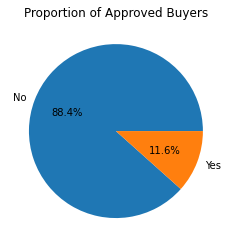

In [91]:
# Graphs
plt.pie(sizes, labels = labelsa, autopct='%1.1f%%')
plt.title('Proportion of Approved Buyers')

Text(0.5, 1.0, 'Reasons why they were not approved')

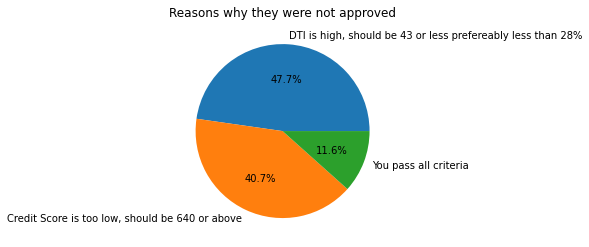

In [92]:
plt.pie(reasonsize, labels = labelsr, autopct='%1.1f%%')
plt.title('Reasons why they were not approved')